In [12]:
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [9]:
data = pd.read_csv('datasets/diabetes.csv')

Glucose = data[['Glucose']]
Bp = data[['BloodPressure']]
Insulin = data[['Insulin']]
DiaPedFUnc = data[['DiabetesPedigreeFunction']]
SkinThikckness = data[['SkinThickness']]
BMI = data[['BMI']]
Age = data[['Age']]
Outcome = data[['Outcome']]
Pregnancies = data[['Pregnancies']]

scaler = MinMaxScaler()

Glucose_norm = scaler.fit_transform(Glucose)
Bp_norm = scaler.fit_transform(Bp)
SkinThikckness_norm = scaler.fit_transform(SkinThikckness)
Insulin_norm = scaler.fit_transform(Insulin)
DiaPedFUnc_norm = scaler.fit_transform(DiaPedFUnc)

# SCATTER

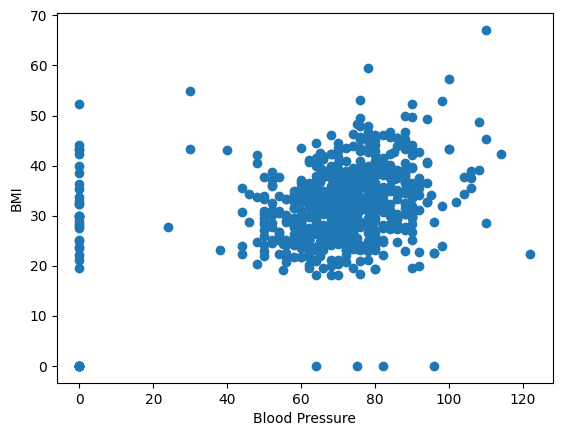

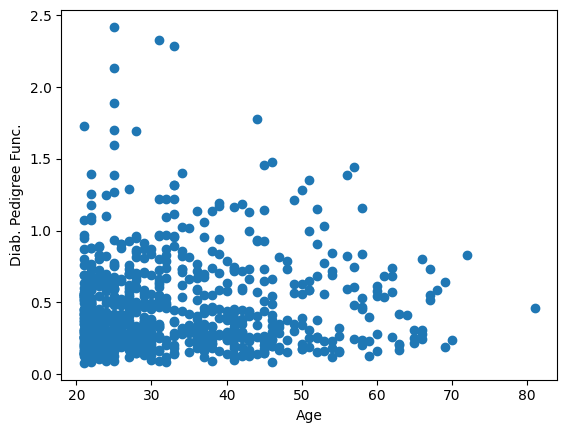

In [10]:
# plt.scatter(Glucose,Glucose_norm)
# plt.xlabel('Glucose level'); plt.ylabel('Normalised Glucose Level')
# plt.show()

# plt.scatter(Bp,Bp_norm)
# plt.xlabel('Blood Pressure level'); plt.ylabel('Normalised Blood Pressure Level')
# plt.show()

# plt.scatter(Insulin,Insulin_norm)
# plt.xlabel('Insulin level'); plt.ylabel('Normalised Insulin Level')
# plt.show()
plt.scatter(Bp,BMI)
plt.xlabel('Blood Pressure'); plt.ylabel('BMI')
plt.show()

plt.scatter(Age,DiaPedFUnc)
plt.xlabel('Age'); plt.ylabel('Diab. Pedigree Func.')
plt.show()

# BAR GRAPH

In [13]:
Insulin_norm.shape

(768, 1)

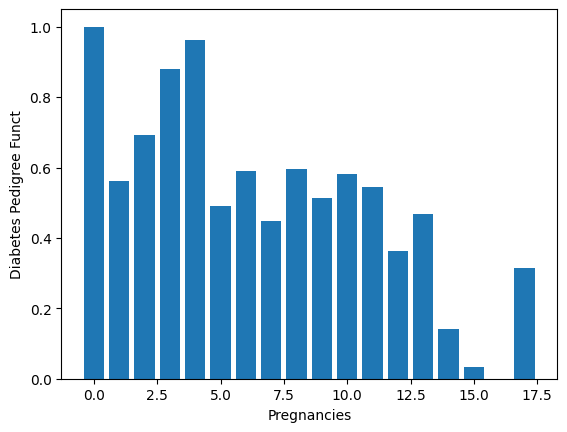

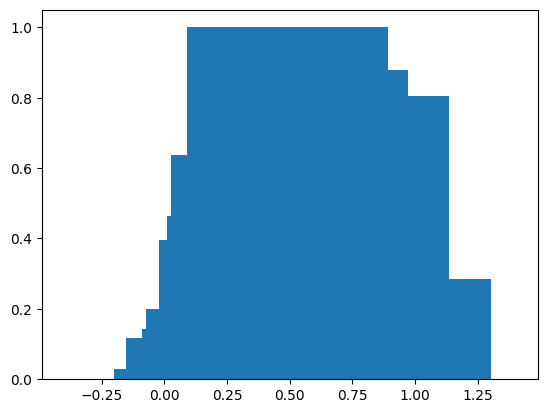

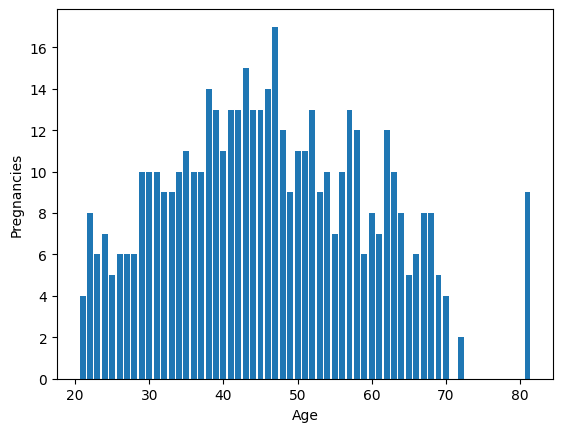

In [11]:
P = Pregnancies.to_numpy().flatten()
DPF = DiaPedFUnc_norm.flatten()
A = Age.to_numpy().flatten()

plt.bar(P,DPF)
plt.xlabel('Pregnancies'); plt.ylabel('Diabetes Pedigree Funct')
plt.show()

# B = Bp.to_numpy().flatten()
# I = Insulin.to_numpy().flatten()
B = Bp_norm.flatten()
I = Insulin_norm.flatten()
plt.bar(B,I)
plt.show()

plt.bar(A,P)
plt.xlabel('Age'); plt.ylabel('Pregnancies')
plt.show()

# PIE CHART

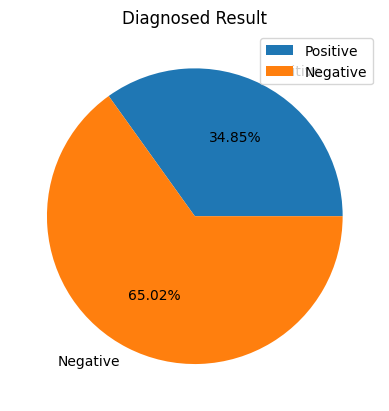

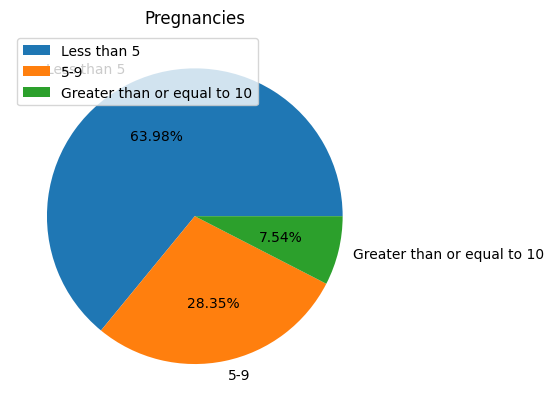

In [14]:
Out = Outcome.to_numpy().flatten()
Yes  =  [ x for x in Out if x == 1]
No = [ x for x in Out if x == 0 ]
size = [ len(Yes),len(No)]
result = ['Positive','Negative']

def percentage(pcts, allvals):
    abs = float(pcts / 100.*np.sum(allvals))
    abs /= 7.69
    return "{:.2f}%".format(abs)

plt.pie(size,
        labels=result,
        autopct=lambda pct: percentage(pct, size))
plt.title('Diagnosed Result')
plt.legend()
plt.show()

preg_pie = []
count  = [c for c in P  if  c < 5]; preg_pie.append(len(count))
count  = [c for c in P  if  5<=  c < 10]; preg_pie.append(len(count))
count  = [c for c in P if  10 <= c]; preg_pie.append(len(count))
label_per = ['Less than 5', '5-9','Greater than or equal to 10']
plt.pie(preg_pie,
        labels=label_per,
        autopct=lambda pct: percentage(pct, preg_pie))
plt.title('Pregnancies')
plt.legend()
plt.show()

# OVERLAY PLOTS


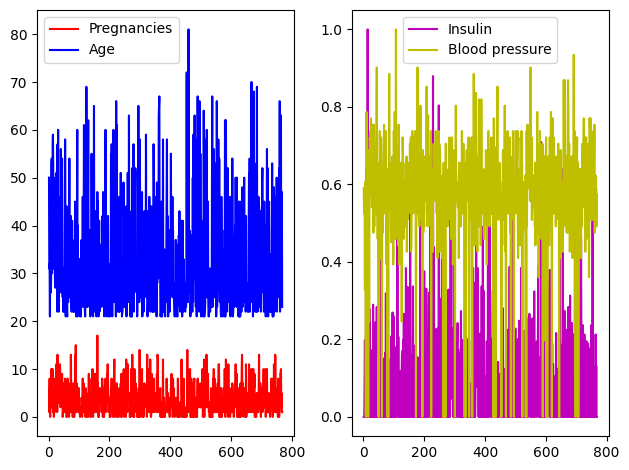

In [15]:
x = np.arange(1,769)

plt.subplot(1,2,1)
plt.plot(x,P, color='r', label='Pregnancies')
plt.plot(x,A, color='b', label='Age')
plt.legend()
#lt.show()
plt.subplot(1,2,2)
plt.plot(x,I, color='m', label='Insulin')
plt.plot(x,B, color='y', label='Blood pressure')
plt.legend()
plt.tight_layout()
plt.show()

# HIST & BOXPLOT

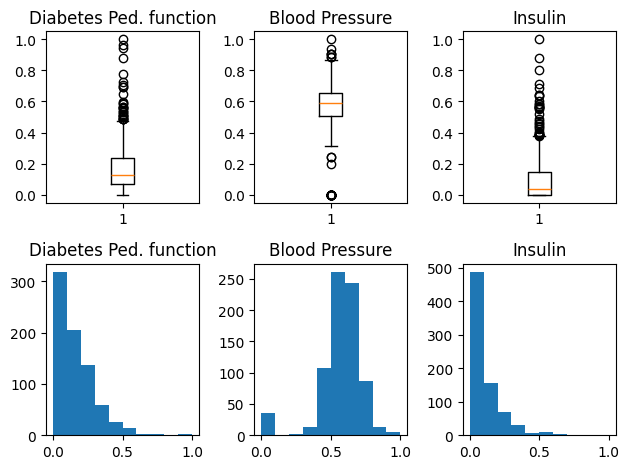

In [8]:
plt.subplot(2,3,1)
plt.boxplot(DiaPedFUnc_norm)
plt.title('Diabetes Ped. function')
plt.subplot(2,3,4)
plt.title('Diabetes Ped. function')
plt.hist(DiaPedFUnc_norm)

plt.subplot(2,3,2)
plt.boxplot(Bp_norm)
plt.title('Blood Pressure')
plt.subplot(2,3,5)
plt.hist(Bp_norm)
plt.title('Blood Pressure')

plt.subplot(2,3,3)
plt.boxplot(Insulin_norm)
plt.title('Insulin')
plt.subplot(2,3,6)
plt.hist(Insulin_norm)
plt.title('Insulin')

plt.tight_layout()
plt.show()